In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('../data/dataframe.csv')
df

,Unnamed: 0,title,author,rating,votes_count,students_count,level,duration,platform,free
0,0,Машинное обучение и анализ данных,Moscow Institute of Physics and Technology,4.7,6382.0,100000.0,Intermediate,224.000000,Coursera,False
1,1,Introducción a la Especialización en Ciencia d...,IBM,4.6,116.0,3400.0,Beginner,48.000000,Coursera,False
2,2,Getting Started with SAS Programming,SAS,4.8,2083.0,67000.0,Beginner,22.000000,Coursera,False
3,3,Introduction to Designing Data Lakes on AWS,Amazon Web Services,4.7,65.0,6100.0,Intermediate,14.000000,Coursera,False
4,4,Estatística não-paramétrica para a tomada de d...,Universidade de São Paulo,4.4,109.0,9300.0,Intermediate,13.000000,Coursera,False
...,...,...,...,...,...,...,...,...,...,...
4678,4678,Diploma in Neural Networks in Python - Deep Le...,Start-Tech Academy,NaN,NaN,690.0,Mixed,8.000000,Alison,False
4679,4679,Data Visualization In Power BI - Master The Vi...,Ayush Kumar,0.0,0.0,219.0,Mixed,2.639167,Skillshare,True
4680,4680,Learn Power BI DAX from scratch,Muhammad Asif,4.0,3.0,93.0,Mixed,1.672778,Skillshare,True
4681,4681,Python For Beginners,Sara Al-Arab,4.0,70.0,83.0,Beginner,2.963056,Skillshare,True


In [3]:
df['platform'].value_counts()

Udemy          2072
Skillshare     1000
Coursera        996
edX             326
Pluralsight     174
FutureLearn      75
Alison           28
Stepik           12
Name: platform, dtype: int64

In [4]:
df.value_counts(['platform', 'rating'])

platform     rating
Skillshare   0.0       410
Udemy        4.6       210
             4.5       189
             4.4       180
Coursera     4.6       170
                      ... 
Stepik       4.6         1
Pluralsight  2.0         1
             3.0         1
Skillshare   1.4         1
Coursera     1.9         1
Length: 105, dtype: int64

Woah! Skillshare needs to step up their game haha!

In [9]:
# df.groupby('platform').mean()['rating'].sort_values(ascending=False)
df.groupby('platform', sort=False).agg(mean_rating=pd.NamedAgg(column='rating', aggfunc='mean')).sort_values('mean_rating', ascending=False)

,mean_rating
platform,
Stepik,4.810000
Coursera,4.490303
FutureLearn,4.437143
Pluralsight,4.366279
Udemy,3.968436
Skillshare,1.913900
edX,NaN
Alison,NaN


In [10]:
len(df['author'].unique())

1566

In [12]:
df.groupby('author').agg(avg_rating_by_author=pd.NamedAgg(column='rating', aggfunc='mean')).sort_values('avg_rating_by_author', ascending=False)

,avg_rating_by_author
author,
Stepik Academy,5.0
Adith Sreeram,5.0
Charles Santana,5.0
Mirco Baragiani,5.0
Sandro Servino,5.0
...,...
Wharton,NaN
WitsX,NaN
Workforce Academy Partnership,NaN


In [17]:
df.groupby(['author', 'platform']).agg(avg_rating_by_author_platform=pd.NamedAgg(column='rating', aggfunc='mean')).sort_values('avg_rating_by_author_platform', ascending=False)

,,avg_rating_by_author_platform
author,platform,
Michael Bunting,Udemy,5.0
Vishwesh Singh,Udemy,5.0
Chris Achard,Pluralsight,5.0
Charles Santana,Udemy,5.0
Mirco Baragiani,Udemy,5.0
...,...,...
Wharton,edX,NaN
WitsX,edX,NaN
Workforce Academy Partnership,Alison,NaN


In [20]:
pd.pivot_table(df, values='students_count', index='level', aggfunc='sum').sort_values('students_count', ascending=False)

,students_count
level,
Beginner,26706424.0
Mixed,21729047.0
Intermediate,16279662.0
Advanced,3926403.0


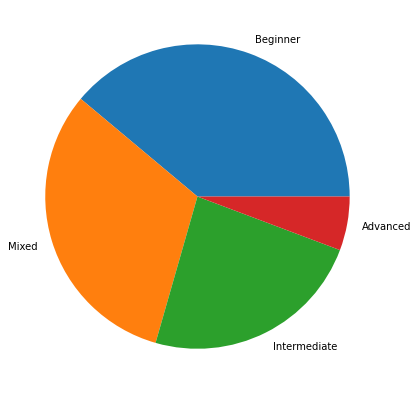

In [25]:
from matplotlib import pyplot as plt
pie_data = pd.pivot_table(df, values='students_count', index='level', aggfunc='sum').sort_values('students_count', ascending=False)
fig = plt.figure(figsize =(10, 7))
plt.pie(pie_data['students_count'], labels=pie_data.index);

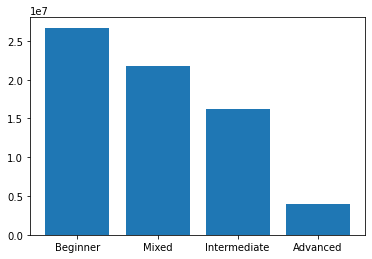

In [28]:
plt.bar(pie_data.index, pie_data['students_count']);